# TASK 2

### - Purvi Harniya

## Prediction using unsupervised machine learning

In this task we have to predict the optimum number of clusters from the given iris dataset and represent it visually.

Data can be found at- https://bit.ly/3kXTdox

The dataset has four variables namely- Sepal Length(cm), Sepal Width(cm), Petal Length(cm), Petal Width(cm) and three species of Iris namely Iris-setosa, Iris-versicolor, Iris-viginica

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading our data

In [2]:
df=pd.read_csv('Iris.csv',index_col=0)
print("Data imported successfully!")

Data imported successfully!


In [3]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Handling null values

In [6]:
#finding total missing or null values in each column of the dataset
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

As we see, there are no null values. Therefore, data cleaning is not required

### Getting the metadata

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


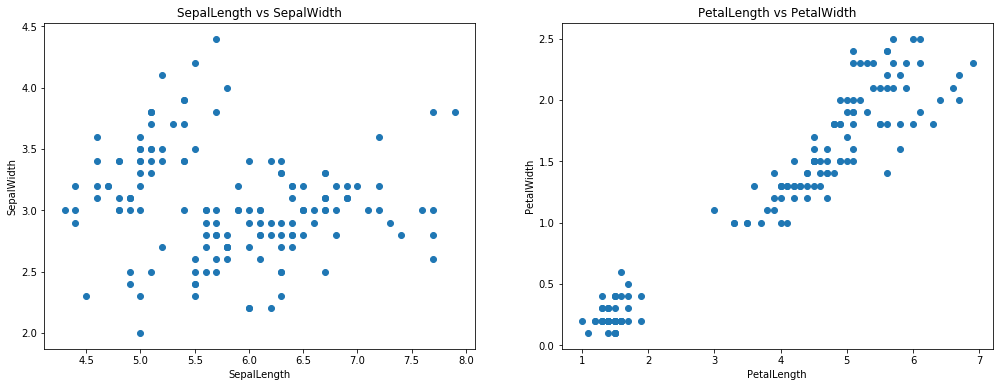

In [8]:
# Scatter plot to determine relation between Sepal length, sepal width and petal length, petal width

fig=plt.figure(figsize=(17,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.scatter(df.iloc[:,0],df.iloc[:,1])
ax1.set_title('SepalLength vs SepalWidth')
ax1.set_xlabel('SepalLength')
ax1.set_ylabel('SepalWidth')

ax2.scatter(df.iloc[:,2],df.iloc[:,3])
ax2.set_title('PetalLength vs PetalWidth')
ax2.set_xlabel('PetalLength')
ax2.set_ylabel('PetalWidth')

plt.show()

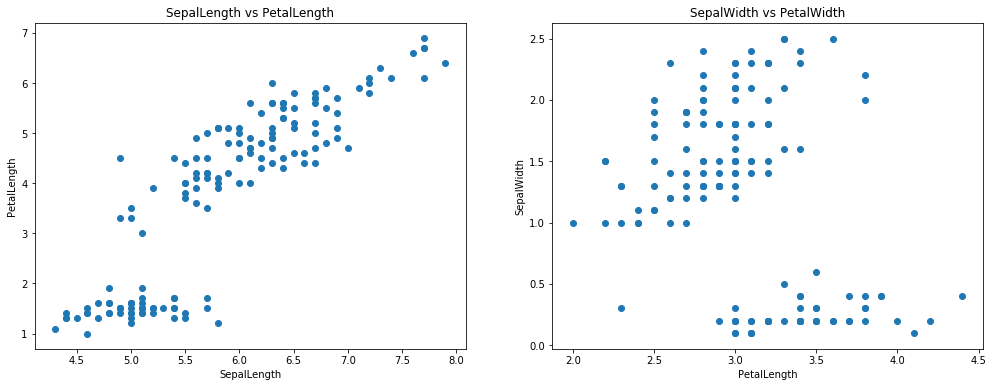

In [9]:
# Scatter plot to determine relation between Sepal length, petal length and sepal width, petal width

fig=plt.figure(figsize=(17,6))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)

ax1.scatter(df.iloc[:,0],df.iloc[:,2])
ax1.set_title('SepalLength vs PetalLength')
ax1.set_xlabel('SepalLength')
ax1.set_ylabel('PetalLength')

ax2.scatter(df.iloc[:,1],df.iloc[:,3])
ax2.set_title('SepalWidth vs PetalWidth')
ax2.set_xlabel('PetalLength')
ax2.set_ylabel('SepalWidth')
plt.show()

### Plotting a pair plot

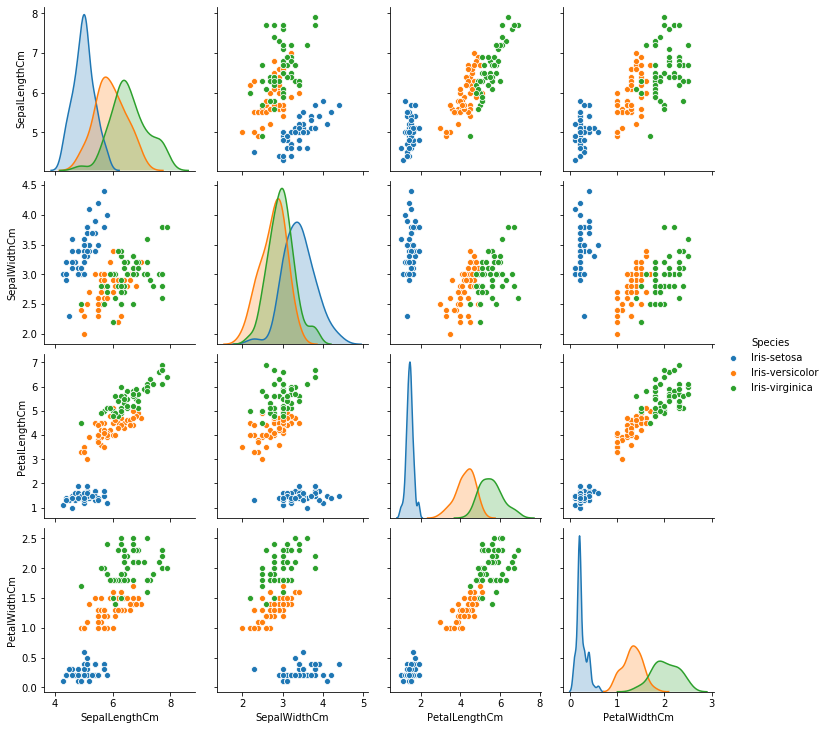

In [10]:
sns.pairplot(df,hue='Species')
plt.show()

### Plotting a heatmap

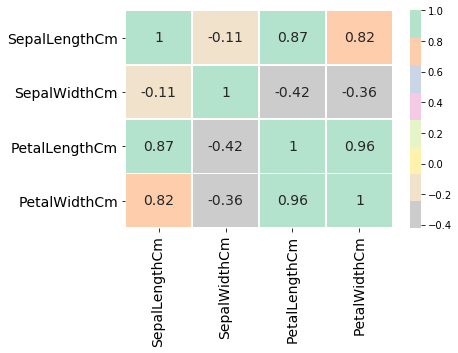

In [11]:
sns.heatmap(df.corr(),linewidths=0.5, cmap='Pastel2_r',annot=True, annot_kws={"size":14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

##### Here we see that there is a strong positive correlation between petal length and petal width and petal length and sepal length.
##### There is a strong negative correlation between petal length and sepal width

In [12]:
#defining the X variable
X= df.iloc[:,[0,1,2,3]].values

### Plotting the Elbow plot

Elbow plot helps us to find the optimum number of clusters

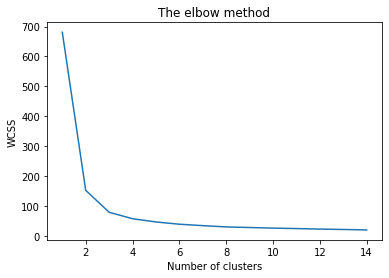

In [13]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# Allowing us to observe 'The elbow'
plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()
sns.set(rc={'figure.figsize':(4,4)})

### Model

In [14]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Visualising the clusters

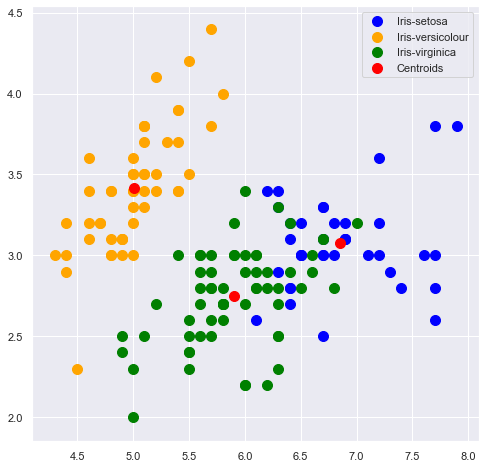

In [16]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()

sns.set(rc={'figure.figsize':(8,8)})

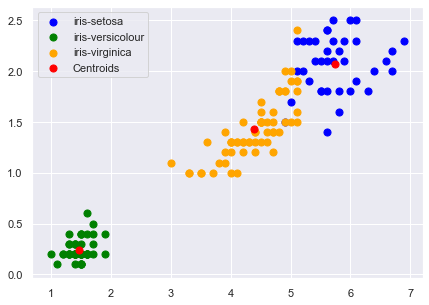

In [17]:
#visualizing the clusters
plt.figure(figsize=(7,5))
plt.scatter(X[y_kmeans==0,2],X[y_kmeans==0,3],s=50,c='blue',label='iris-setosa')
plt.scatter(X[y_kmeans==1,2],X[y_kmeans==1,3],s=50,c='green',label='iris-versicolour')
plt.scatter(X[y_kmeans==2,2],X[y_kmeans==2,3],s=50,c='orange',label='iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], 
            s = 50, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

### ThankYou